# Wine Quality Classification based on Attention Model k-Nearest Neighbor Algorithms

## Introduction


This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. - The datasets can be viewed as classification or regression tasks.
This data frame contains the following columns:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality

In this study, we present a practical application where multiple machine learning models are employed to predict wine taste preferences using readily available analytical data from the certification stage. To determine the optimal parameters with minimal computational effort, we use conventional k-NN algorithm. Knowing that k-NN algorithms under-performs under high dimensional environments, the main purpose of this article is to assess attention model based k-NN by comparing accuracy with other existing models. 

Incorporating the "Attention Is All You Need" mechanism into k-NN can enhance its dimension reduction capabilities by focusing on the most important features in the data. By applying self-attention, the model can learn to weigh the relevance of different features and identify which are most crucial for making predictions. This approach reduces the influence of less important dimensions and helps the k-NN algorithm focus on the most relevant aspects of the dataset. Similar to how attention highlights key relationships in natural language processing, in k-NN, it enables the model to perform more efficiently, improving accuracy and reducing computational complexity in high-dimensional spaces.


test

### Procedure
- Data analysis of the dataset "WineQT.csv"
- Feature selection/engineering
- Attention model and training
- PCA and LDA model
- Results and discussion

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import plotly.graph_objects as go
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px

df = pd.read_csv('WineQT.csv')


## Data Analysis

In [3]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [5]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Graph all data in one diagram just for fun


Unique Quality:  [5 6 7 4 8 3]


<Axes: >

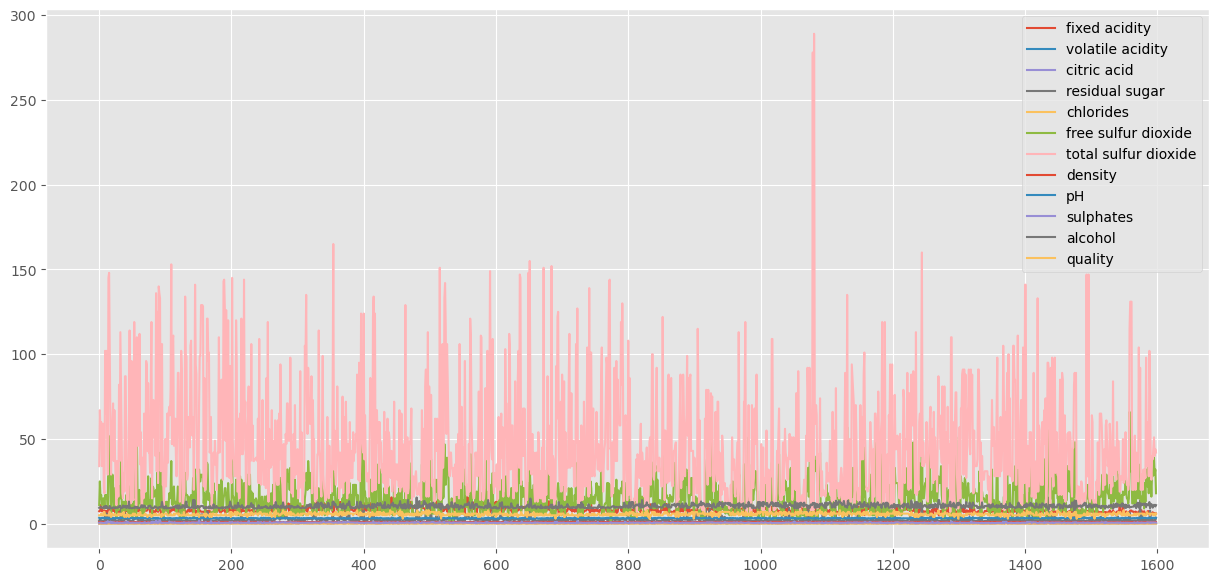

In [6]:
print("Unique Quality: ", df['quality'].unique())
df.plot(figsize=(15, 7))

In [7]:
average_quality = df.groupby('quality').mean()

average_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


<Axes: xlabel='quality'>

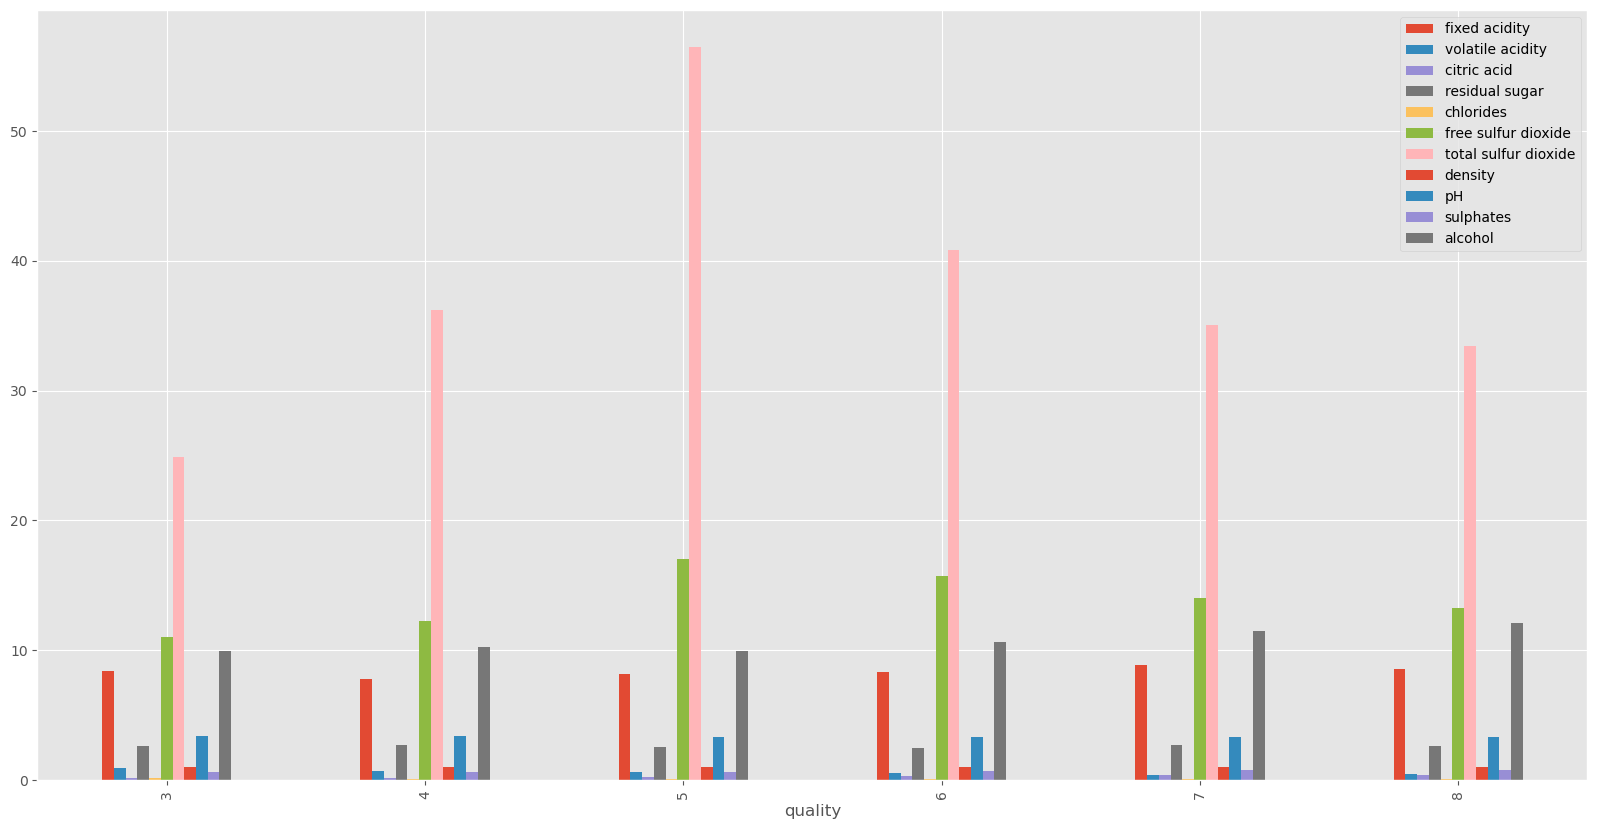

In [8]:
average_quality.plot(kind='bar', figsize=(20, 10))

See effect some of the elements on the quality-details

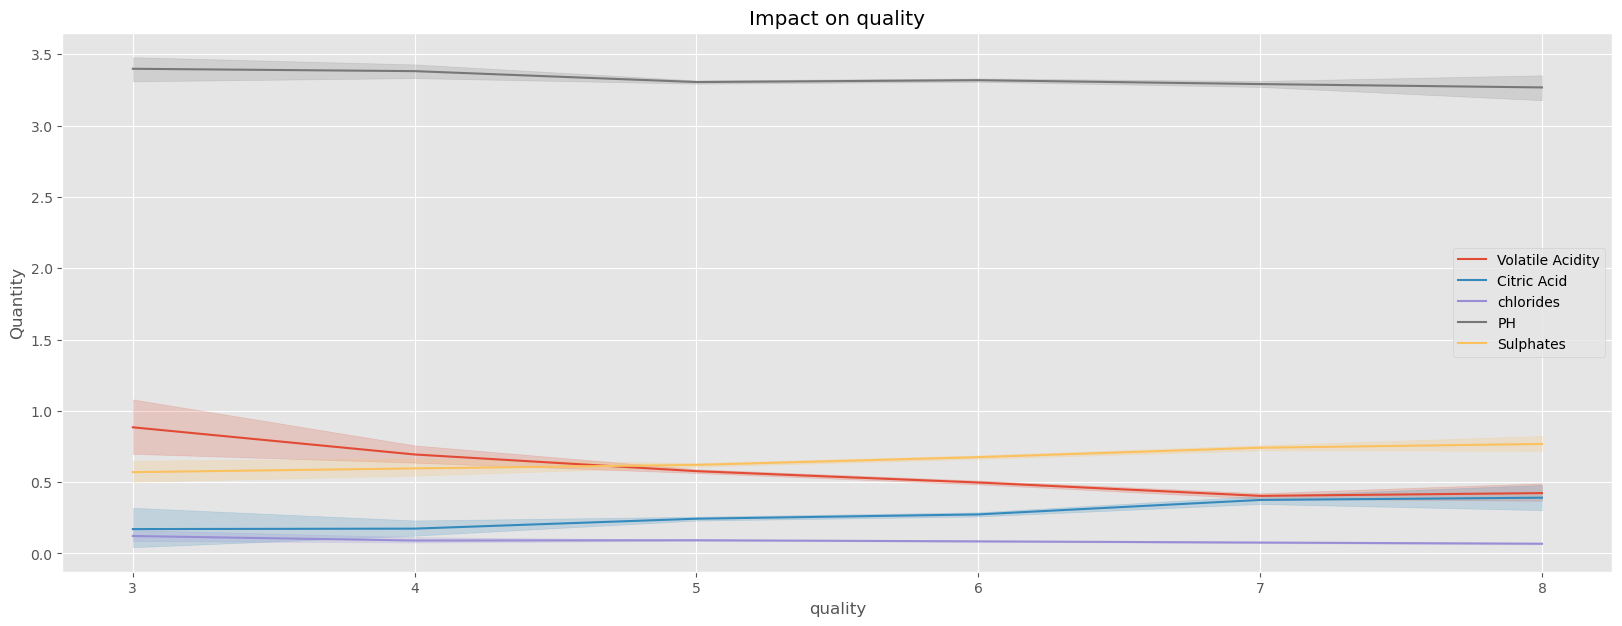

In [9]:


plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="volatile acidity",label="Volatile Acidity")
sns.lineplot(data=df, x="quality",y="citric acid",label="Citric Acid")
sns.lineplot(data=df, x="quality",y="chlorides",label="chlorides")
sns.lineplot(data=df, x="quality",y="pH",label="PH")
sns.lineplot(data=df, x="quality",y="sulphates",label="Sulphates")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

Alcohol effect on quality

<Axes: xlabel='quality', ylabel='alcohol'>

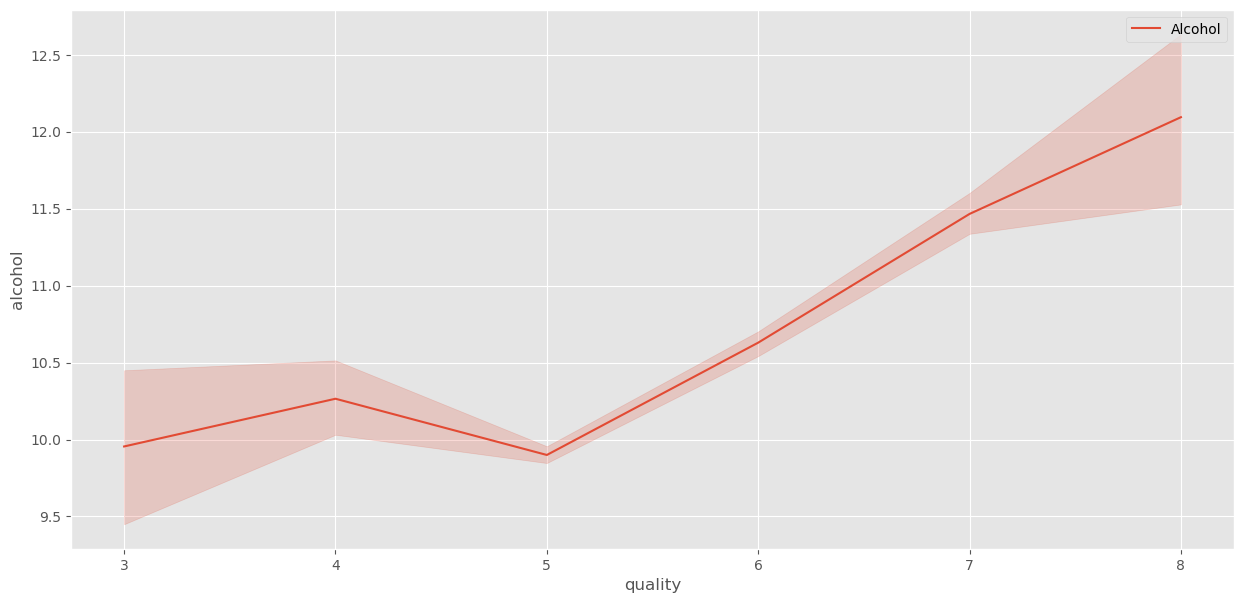

In [10]:


plt.figure(figsize=(15,7)) 
sns.lineplot(data=df, x="quality", y="alcohol", label="Alcohol")

Effect of total sulfur dioxide on quality

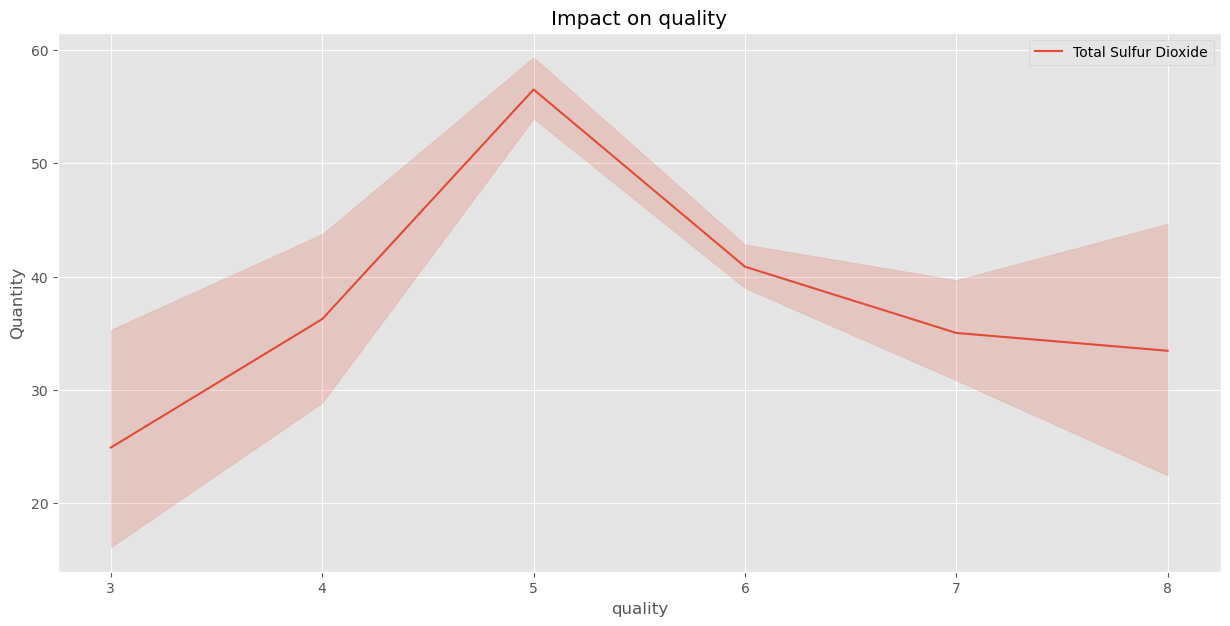

In [11]:


plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality", y="total sulfur dioxide", label="Total Sulfur Dioxide")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()

Effect of free sulfur dioxide on quality

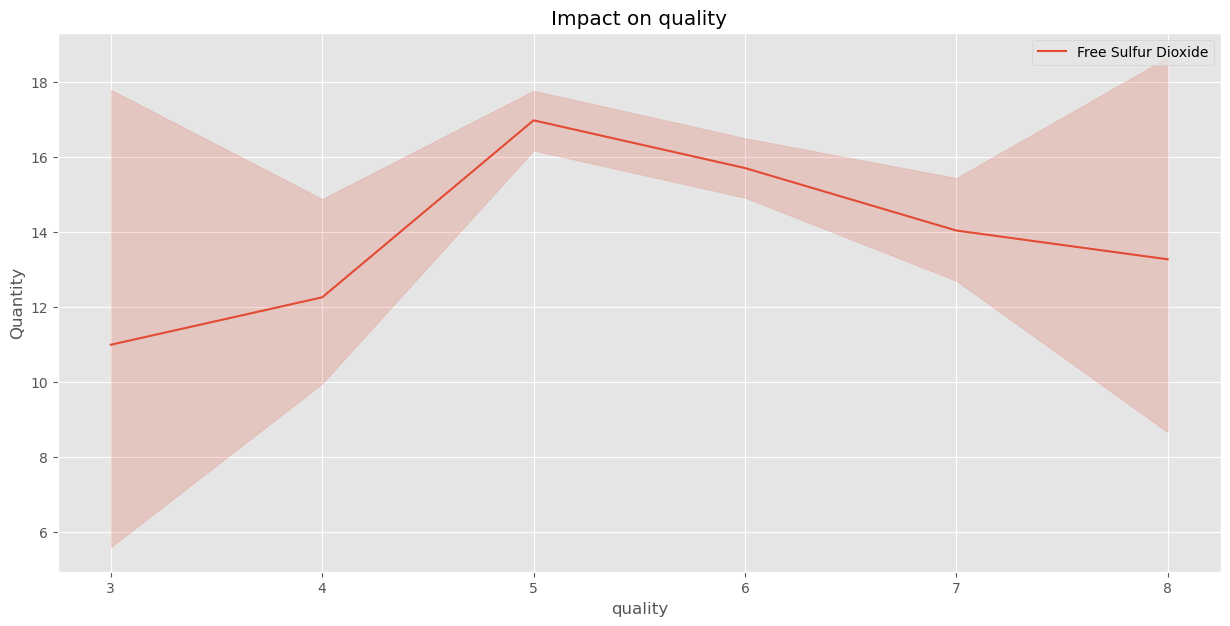

In [12]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality", y="free sulfur dioxide", label="Free Sulfur Dioxide")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()

Using graph interactive the show the effect free and total - sulfur dioxide in the quality

In [13]:
px.scatter(df, x="free sulfur dioxide", y="total sulfur dioxide",animation_frame="quality")

Using graph interactive the show the effect free and total - sulfur dioxide in the quality


In [14]:

px.scatter(df, x="free sulfur dioxide", y="total sulfur dioxide",animation_frame="quality")

## Feature Selection/Engineering

### Principal Component Analysis

<Axes: >

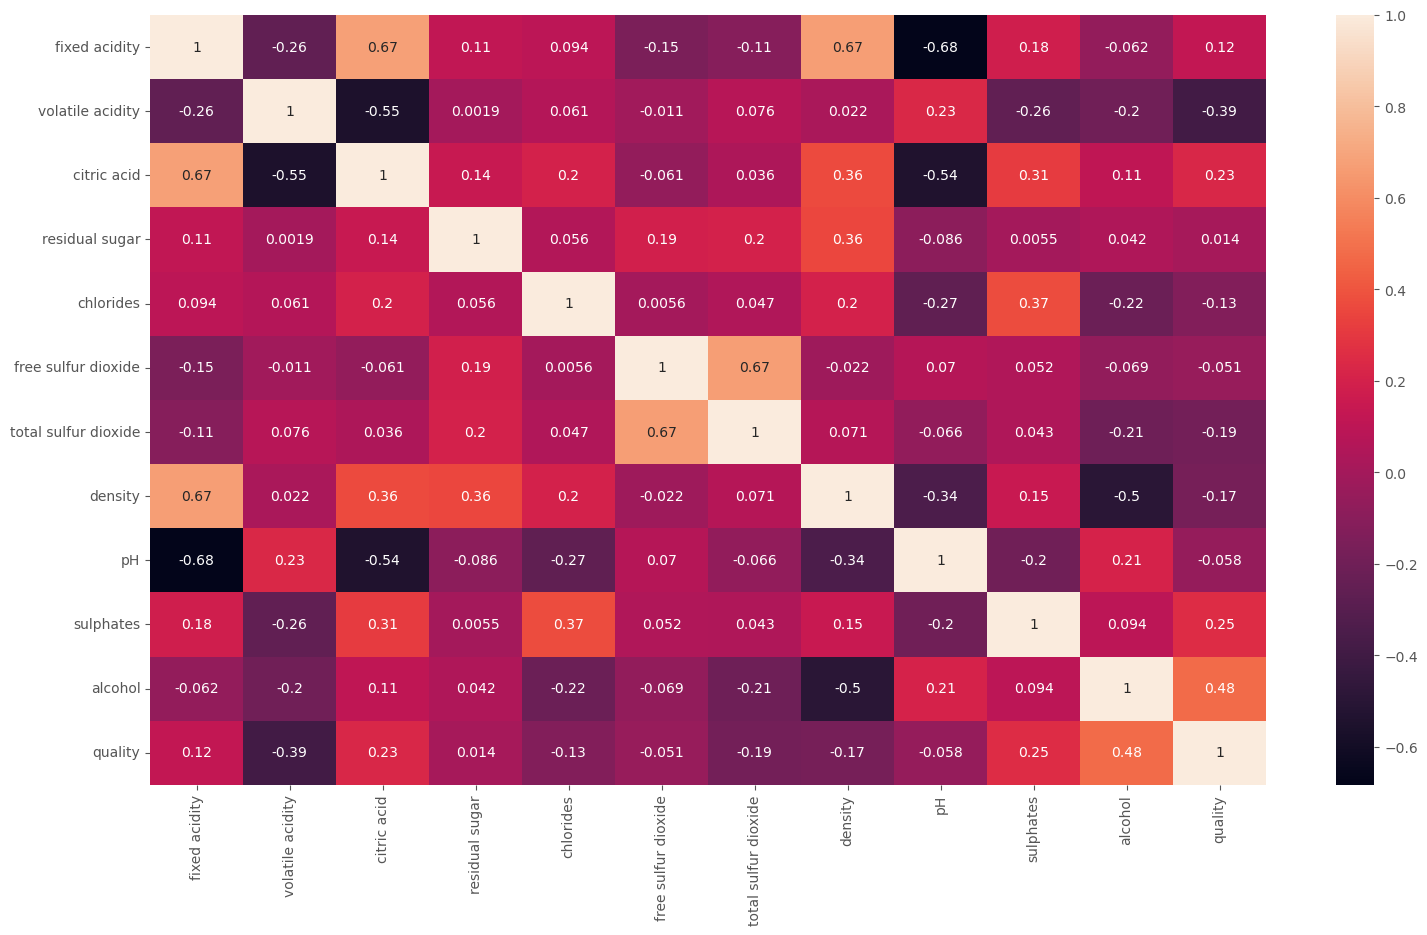

In [15]:
plt.figure(figsize = (18,10))
sns.heatmap(df.corr(), annot=True)

From above heatmap of correlation matrix we can interpret that many attributes are showing linear correlation with each other. So, Lets try to reduce redundancy from the data.

Just to make things simple lets predict the attribute 'density' instead of attribute 'quality'

In [16]:
def FE_PCA_linear_regression(x, y):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error

    FE_PCA_x_train, FE_PCA_x_test, FE_PCA_y_train, FE_PCA_y_test = train_test_split(x, y, test_size = 0.2, random_state = 11)
    FE_PCA_lr = LinearRegression()
    FE_PCA_lr.fit(FE_PCA_x_train, FE_PCA_y_train)
    
    FE_PCA_y_pred = FE_PCA_lr.predict(FE_PCA_x_test)
    print(f"Mean Squared Error = {mean_squared_error(FE_PCA_y_test, FE_PCA_y_pred)}")
    
    return FE_PCA_lr

In [17]:
from sklearn.decomposition import PCA

FE_pca = PCA(n_components = 8)

x_FE_PCA = df.drop("density", axis = 1)
y_FE_PCA = df['density']

x_pca = FE_pca.fit_transform(x_FE_PCA)

pc = FE_PCA_linear_regression(x_pca, y_FE_PCA.values.reshape(-1, 1))

Mean Squared Error = 8.428507189961784e-07


### Kernel Principal Component Analysis

Principal component analysis is an effective dimension reduction technique when attributes are linearly correlated and when the resulting scores are associated with the outcome. Consider the following equation:

$ y = x_1 + x_2^2 + x_1^2 + x_2 + noise $

Suppose also that the correlation between x1 and x2 is strong. Applying traditional PCA to this example would summarize the relationship between x1 and x2 into one principal component. However this approach would ignore the important quadratic relationships that would be critically necessary for predicting the outcome.

Therefore traditional PCA will be a much less effective dimension reduction technique when the data should be augmented with additional features.

In [18]:
from sklearn.decomposition import KernelPCA

FE_Kernel_pca = KernelPCA(n_components = 8, kernel = 'rbf')

x_FE_Kernel_PCA = df.drop("density", axis = 1)
y_FE_Kernel_PCA = df['density']

x_pca = FE_Kernel_pca.fit_transform(x_FE_Kernel_PCA)

pc = FE_PCA_linear_regression(x_pca, y_FE_Kernel_PCA.values.reshape(-1, 1))

Mean Squared Error = 3.2439315519459268e-06


...to be continued


## Attention Mechanism and k-NN Algorithm

### Procedure:

- Preprocess the dataset by normalizing and standardizing the features(feature engineering)
- Split the dataset into training and testing sets
- Implement the k-NN algorithm with atttention mechanism
- Train th emodel using the training set
- Evaluate the model's performance using the testing set

The majority of the first step have already been discussed in the feature engineering section. We may repeat the steps and integrade them into the code. 

First we split the dataset:

In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the wine quality dataset
df = pd.read_csv('WineQT.csv')

# Preprocess the dataset
X = df.drop('density', axis=1)
y = df['density']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

We can output the index just for fun:

In [20]:
print(y_train.index)

Index([ 493,  354,  342,  834,  705,  522, 1590, 1404, 1055,  277,
       ...
       1238,  466,  121, 1044, 1095, 1130, 1294,  860, 1459, 1126],
      dtype='int64', length=1279)


In [21]:
class AttentionKNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.sum((self.X_train - x) ** 2, axis=1)
            indices = np.argsort(distances)[:self.k]
            attention_weights = self.calculate_attention_weights(distances[indices])
            x_attention = self.apply_attention(self.X_train[indices], attention_weights)
            y_pred = np.average(self.y_train[indices], weights=attention_weights)
            predictions.append(y_pred)
        return np.array(predictions)

    def calculate_attention_weights(self, distances):
        # Apply attention mechanism to calculate weights
        # You can use any attention mechanism formula here
        # For simplicity, we'll use a simple exponential decay
        attention_weights = np.exp(-distances)
        attention_weights /= np.sum(attention_weights)
        return attention_weights

    def apply_attention(self, X, attention_weights):
        # Apply attention mechanism to the feature vectors
        # Here, we simply multiply the feature vectors by the attention weights
        x_attention = X * attention_weights[:, np.newaxis]
        return x_attention

The `AttentionKNN` class implements the attention-enhanced k-NN algorithm. The `fit` method stores the trainnign data, and the `predict` method calculates the predicted values for the given input data using the attention mechanism. The `calculate_atrtention_weights` method applies the attention mechanism to calculate the weights for each neibor based on their distances.

`apply_attention` method applies the attention mechanism to the feature vectors. The attention weights are calculated using the `calculate_attention_weights` method, which applies the exponential decay formula. The resulting atteition-weighted feature vectors are then returned by the `predict` method. 

Such class can be used as a stanalone compnent in the code to incorporate the attention mechanism into the k-NN algorithm.

We use sci-kit learn module for k-NN and other fuctions. 

In [22]:
# Train the attention-enhanced k-NN model
knn = AttentionKNN(k=5)
knn.fit(X_train, y_train)

# Predict on the testing set
y_pred = knn.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

KeyError: '[788] not in index'